
## **Project:** Wine Quality - <span style="color:darkcyan">Data Cleaning</span> <br> Mauro Cardoso

#### BUSINESS UNDERSTANDING / **PROJECT OBJECTIVE** »
- The aim of this analysis is to predict the quality of new wines without resorting to expert assessment. To this end, 6497 wines are registered, data from their respective chemical analyses, and the evaluation of experts. Using two datasets consisting on physicochemical data from red and white Vinho Verde wine samples, from the north of Portugal, and a quality classification, our client wants to build an application to automatically classify new samples of Vinho Verde.

### Installs section:

### Imports section:

In [45]:
import pandas as pd
import random as rd
import numpy as np
import seaborn as sns
import scipy
from matplotlib import pyplot as plt
import warnings
from pathlib import Path
warnings.filterwarnings("ignore", category=FutureWarning)

pd.set_option('expand_frame_repr', False) # expand print function visualization
pd.set_option('display.max_columns', None) # expand/use all columns
#pd.options.display.float_format = '{:20,.2f}'.format # Withdrawal of scientific notation

### Data First Look:

DataFrame creation and data import:

In [46]:
root_marker = 'README.md'

current_dir = Path.cwd()

while not (current_dir / root_marker).exists() and current_dir != current_dir.parent:
    current_dir = current_dir.parent

w_csv_path = current_dir / 'data' / 'raw' / 'winequality-white.csv'
r_csv_path = current_dir / 'data' / 'raw' / 'winequality-red.csv'

df_white = pd.read_csv(w_csv_path, delimiter=';')
df_red = pd.read_csv(r_csv_path, delimiter=';')


Let's see how the data looks by using pandas methods like `head()`, `info()` and `describe()`. 

**First, we will use the `head` method.**

It can be seen the first 5 rows of the datasets using the `head` method. This by itself doesn't tell us much about the data, but we can have a first look at the features (columns) and some of the values that each one takes. It is very important to know the amount of data we have, because everything will depend on that, from the quality of the analysis to the choice of our infrastracture.

In [47]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [48]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


The two datasets are relatively the same in terms of columns, but it would make sense to combine them for subsequent analysis, and in this case a new feature called type will be added to differentiate them.

In [49]:
def add_column_type(df: pd.DataFrame, type:str):
    df['type'] = type

add_column_type(df_white, 'white')
add_column_type(df_red, 'red')

# total dataset (as pandas dataframes)
df = pd.concat([df_white, df_red], axis=0)
df.columns = df.columns.str.replace(" ","_",regex=True) # Removing spaces from column names

In [50]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [51]:
print(f'Test Shape: {df.shape}')

Test Shape: (6497, 13)


With the `info` method, it can be seen the features of the dataset, and the amount of observations (rows) that have a non-null value and the types of the features. 

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


There's no null values to deal with. All data types seem to be appropriate,

#### A deeper look: checking the basic statistics.

The `describe` method gives us an overview of our data. From here we can see all the descriptive metrics for our variables.

In [53]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Residual sugar, free_sulfur_dioxide, total_sulfur_dioxide have some high max values, this could be an indication of an outlier.
From the percentiles it can be seen that most of the classes do not have a normal distribuition.

From the code below, it can be confirmed that aren't no missing values.

In [54]:
def calculate_missing_data(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (round((df.isnull().sum() / df.isnull().count() * 100), 0)).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['TOTAL', '%'])
    missing_data = missing_data[missing_data['TOTAL'] != 0]

    return missing_data

In [55]:
calculate_missing_data(df)

,TOTAL,%


If we had missing values, the following strategies could be implemented in the dataset.., It will randomly remove 10%, 20%, 30% of the data, analyze and implement a logic to deal with this missing data:

In [56]:
def insert_random_missing_values(df, percent_missing):
    df_missing = df.copy()
    n_rows, n_cols = df_missing.shape
    total_cells = n_rows * n_cols
    n_missing = int(total_cells * percent_missing / 100)

    for _ in range(n_missing):
        x = rd.randint(0, n_rows-1)
        y = rd.randint(0, n_cols-1)
        df_missing.iat[x, y] = np.nan

    return df_missing

In [57]:
df_with_missing_10 = insert_random_missing_values(df, 10)
df_with_missing_20 = insert_random_missing_values(df, 20)
df_with_missing_30 = insert_random_missing_values(df, 30)

In [58]:
#calculate_missing_data(df_with_missing_10)
#calculate_missing_data(df_with_missing_20)
calculate_missing_data(df_with_missing_30)

,TOTAL,%
total_sulfur_dioxide,1753,27.0
fixed_acidity,1740,27.0
type,1730,27.0
quality,1723,27.0
sulphates,1707,26.0
volatile_acidity,1687,26.0
alcohol,1679,26.0
density,1669,26.0
free_sulfur_dioxide,1655,25.0
chlorides,1649,25.0


**There are different ways of dealing with missing data:** <br>
* Delete the Column <br>
* Delete the rows <br>
* Imputation: <br>
    * Fill in the missing data with the mean or median value if it is a numerical variable. <br>
    * Fill in the missing data with the mode if it is a categorical value. <br>
    * Fill in the numerical value with 0 or -999, or any other number that does not occur in the data.
    This can be done so that the machine can recognize that the data is not real or is different. <br>
    * Fill in the categorical value with a new type for the missing values.

In this case, the analysis has not yet been carried out on the columns that are not necessary for a good evaluation of the model. As this strategy is very extreme, other examples of strategies will be used. <br>

Removing rows is obvious, but we would lose information that could be valuable. 

Given these assumptions, value imputation strategies will be implemented.

Our dataset is prone to outliers, so filling in the missing values with the median is a very viable solution for numerical columns:

In [59]:
def fill_missing_with_median(df, columns):
    updated_df = df.copy()
    for column in columns:
        if column in updated_df.columns:
            median_value = updated_df[column].median()
            updated_df[column] = updated_df[column].fillna(median_value)
        else:
            print(f"Warning: Column '{column}' not found in DataFrame.")
    return updated_df

For the categorical column, we can perform forward fill or back fill. This takes the value from the previous or next column to fill in the missing value.

In [60]:
df_with_missing_30 = fill_missing_with_median(df_with_missing_30, df.iloc[:,:-1].columns.values)
calculate_missing_data(df_with_missing_30)

,TOTAL,%
type,1730,27.0


In [61]:
df_with_missing_30['type'].ffill(inplace=True)
df_with_missing_30['type'].bfill(inplace=True) # In Case First Line is NaN
calculate_missing_data(df_with_missing_30)

,TOTAL,%


This logic can be applied to all dataframes created with missing values.

### Data understanding:

Let's understand a bit about the data.

The Wine Quality dataset contains information about various physicochemical properties of wines.
This dataset only has numeric variables:
    
| FEATURES | DESCRIPTION | VARIABLE TYPE
|:-------|:-------|:-------|
**fixed acidity:**| Influences the flavor of the wine. A significant reduction in acids can lead to wines that taste flat. Examples of fixed acids are tartaric, malic, citric, and succinic, which can be found in grapes (except succinic). It is measured in g/dm3.|Continuous numerical|
**volatile acidity:**| These acids must be distilled out from the wine before the end of the production process. Excess of volatile acids are undesirable and lead to unpleasant flavor. It is measured in g/dm3.|Continuous numerical|
**citric acid:**| The amount of citric acid in the wine, which most of it is usually consumed during the fermentation process. It acts as a preservative and small quantities can add freshness and flavor. It is measured in g/dm3.|Continuous numerical|
**residual sugar:**| The amount of sugar remaining after the end of the fermentation. The goal is to have a perfect balance between sweetness and sourness. Wines with more than 45g/dm3 are considered sweet. It is measured in g/dm3.|Continuous numerical|
**chlorides:**| The amount of salt in the wine.|Continuous numerical|
**free sulfur dioxide:**| The amount of sulfur dioxide (SO2) in free form. They are also known as sulfites and too much of it is undesirable and gives a pungent odour. It is measured in g/dm3.|Continuous numerical|
**total sulfur dioxide:**| The total amount of SO2 in the wine. This is added to kill harmful bacteria and preserve quality and freshness. It is measured in mg/dm3.|Continuous numerical|
**density:**| It is used as a measure of the conversion of sugar to alcohol. Sweeter wines have higher density.|Continuous numerical|
**pH:**| Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic).|Continuous numerical|
**sulphates:**| The amount of mineral salts containing sulfur in the wine. It is an additive which can contribute to sulfur dioxide gas (S02) levels and acts as an antimicrobial and antioxidant. They are related to the fermentation process and affect the aroma and flavor of the wine.|Continuous numerical|
**alcohol:**| Alcohol is formed as a result of yeast converting sugar during the fermentation process. It's usually measured in % volume or alcohol by volume (ABV).|Continuous numerical|
**quality:**| A quality label in the range of 0 (very bad) to 10 (very excellent). It is the median of at least three evaluations made by wine experts.|Discrete numerical|
**type:**| Wine type - In this case can be white or red.|Nominal Categorical|

In the table above explaining the classes, it can be validated that most of the classes are numerical continuous, i.e., as nature/understanding they can assume any value in a range. So we can discretize them, `if the big-picture it's not lost`.

### Data Cleansing:

#### Verification of possible outliers for the classes:
In the statistical representation of the Dataframe, it's noticed that the features (fixed_acidity, residual_sugar, free_sulfur_dioxide, total_sulfur_dioxide, among some others) have some considerable values in the max value compared to 75% percentile, this can mean as an alert for outliers.

<Axes: xlabel='sulphates'>

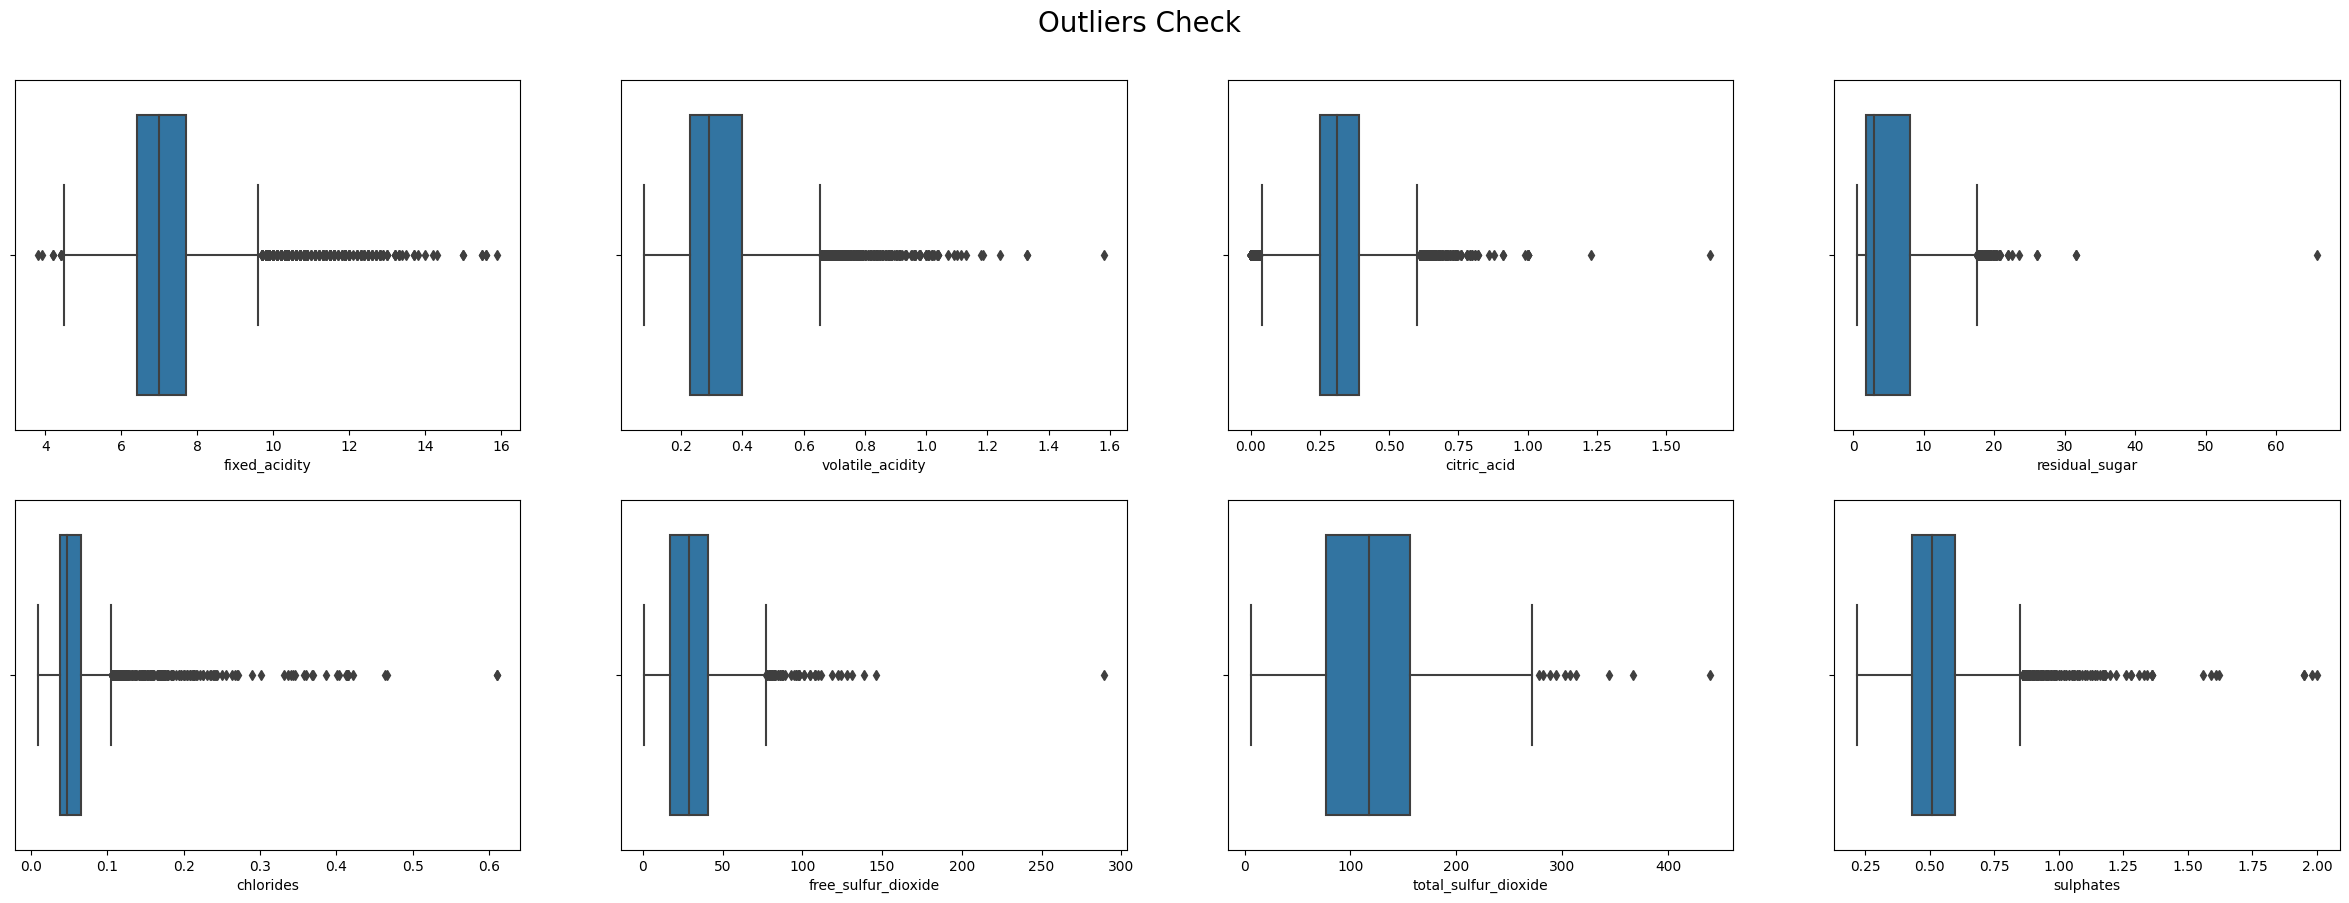

In [62]:
f, axes = plt.subplots(2, 4, figsize=(30, 10)) # Allows me to present the boxplots below in the same line
plt.suptitle('Outliers Check', x=0.5, y=0.95, ha='center', fontsize='20')

# Boxplot display according to quality
sns.boxplot(order ='quality', x=df["fixed_acidity"],  ax=axes[0][0]) 
sns.boxplot(order ='quality', x=df["volatile_acidity"],  ax=axes[0][1]) 
sns.boxplot(order ='quality', x=df["citric_acid"],  ax=axes[0][2]) 
sns.boxplot(order ='quality', x=df["residual_sugar"],  ax=axes[0][3]) 
sns.boxplot(order ='quality', x=df["chlorides"],  ax=axes[1][0]) 
sns.boxplot(order ='quality', x=df["free_sulfur_dioxide"],  ax=axes[1][1]) 
sns.boxplot(order ='quality', x=df["total_sulfur_dioxide"],  ax=axes[1][2])
sns.boxplot(order ='quality', x=df["sulphates"],  ax=axes[1][3]) 

There are considerable values outside the whiskers in the classes observed, but it would not be feasible to disregard this data. So perhaps it would make sense to remove the most dispersed values from the distribution's maxima and minima. So let's take a look at the top 20 values for each validated class.

In [63]:
top_20_wine = pd.DataFrame({col: df[col].nlargest(20).values for col in df.iloc[:,:-1].columns})
top_20_wine

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,15.9,1.580,1.66,65.80,0.611,289.0,440.0,1.03898,4.01,2.00,14.90,9
1,15.6,1.330,1.23,31.60,0.610,146.5,366.5,1.01030,4.01,1.98,14.20,9
2,15.6,1.330,1.00,31.60,0.467,138.5,344.0,1.01030,3.90,1.95,14.05,9
3,15.5,1.240,1.00,26.05,0.464,131.0,313.0,1.00369,3.90,1.95,14.00,9
4,15.5,1.185,1.00,26.05,0.422,128.0,307.5,1.00369,3.85,1.62,14.00,9
5,15.0,1.180,1.00,23.50,0.415,124.0,303.0,1.00320,3.82,1.61,14.00,8
6,15.0,1.130,1.00,22.60,0.415,122.5,294.0,1.00315,3.81,1.59,14.00,8
7,14.3,1.115,1.00,22.00,0.415,118.5,289.0,1.00315,3.80,1.56,14.00,8
8,14.2,1.100,0.99,22.00,0.414,112.0,282.0,1.00315,3.80,1.36,14.00,8
9,14.0,1.090,0.91,20.80,0.414,110.0,278.0,1.00295,3.79,1.36,14.00,8


By validating this data, it may not be necessary to remove information. The first line seems to be the most scattered value, because of the free_sulfur_dioxide field at 289 and the total_sulfur_dioxide at 440. These values, despite being what they are, if deleted we would be losing information that could be valuable. Since the data is numerical continuous, it will be processed differently.

Attributes which are continuous are subject to have problems with modeling process. Commonly occurring issues:

- Be on vastly different scales.
- Follow a skewed distribution where a small proportion of samples are orders of magnitude larger than the majority of the data (i.e., skewness).
- Contain a small number of extreme values.
- Be censored on the low and/or high end of the range.
- Have a complex relationship with the output and be truly predictive but cannot be adequately represented with a simple function or extracted by sophisticated - models.
- Contain relevant and overly redundant information. That is, the information collected could be more effectively and efficiently represented with a smaller, consolidated number of new attributes while still preserving or enhancing the new attributes relationships with the output.


The columns identified with the highest max values and discrepancies from the 75% percentile could be discretised. With some research, it was managed to find pre-defined classifications of this theme, for example for the residual sugar class, in which it can classify the values. (https://en.wikipedia.org/wiki/Sweetness_of_wine):

|Rating|Sugar content (grams per litre)|
|:-------|:-------|
Brut Nature (no added sugar)|	0–3|
Extra Brut|	0–6|
Brut|	0–12|
Extra Dry, Extra Sec, Extra seco|	12–17|
Dry, Sec, Seco|	17–32|
Demi-sec, Semi-seco	|32–50|
Doux, Sweet, Dulce|	50+|

It would be possible to discretise this information and classify it in the most discrete way! However, there are other techniques that can be applied, without losing the value of the data and trying to get the most normalize distribution. `One way is to transform the fields to a logarithmic scale.`

#### Feature Enginnering - Data Balancing/Reducing:

There are clearly more white wine values and this can skew the way the models perform! So in the next scripts, information will be balanced! Data will be lost.

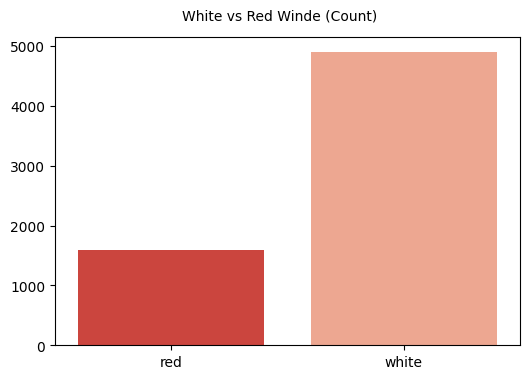

In [64]:
d_tmp = {'Type': ['red','white'], 'Count' : [len(df[df['type'] == 'red']),len(df[df['type'] == 'white'])]}

fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'Type', y = 'Count', data = d_tmp, palette = 'Reds_r')
plt.suptitle('White vs Red Winde (Count)', x=0.5, y=0.95, ha='center', fontsize='10')
plt.show()

#### Feature Enginnering - Data Normalization:

In [65]:
def log_transform(df: pd.DataFrame) -> pd.DataFrame:
    df_copy = df.copy()
    
    for column in df_copy.columns:
        if df_copy[column].dtype == 'float':
            df_copy[f'rlog_{column}'] = np.log(df_copy[column] + 1)

    return df_copy

In [66]:
new_df = log_transform(df)
new_df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,rlog_fixed_acidity,rlog_volatile_acidity,rlog_citric_acid,rlog_residual_sugar,rlog_chlorides,rlog_free_sulfur_dioxide,rlog_total_sulfur_dioxide,rlog_density,rlog_pH,rlog_sulphates,rlog_alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,2.094945,0.285544,0.270566,1.620738,0.054023,3.267236,4.578302,0.690491,1.438759,0.421748,2.436394
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.145045,0.114761,0.109937,0.682150,0.030788,0.655486,0.699104,0.001503,0.037909,0.091628,0.101728
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,1.568616,0.076961,0.000000,0.470004,0.008960,0.693147,1.945910,0.686681,1.313724,0.198851,2.197225
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,2.001480,0.207014,0.223144,1.029619,0.037296,2.890372,4.356709,0.689310,1.413423,0.357674,2.351375
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,2.079442,0.254642,0.270027,1.386294,0.045929,3.401197,4.779123,0.690589,1.437463,0.412110,2.424803
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,2.163323,0.336472,0.329304,2.208274,0.062975,3.737670,5.056246,0.691641,1.463255,0.470004,2.509599
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,2.827314,0.947789,0.978326,4.201703,0.476855,5.669881,6.089045,0.712450,1.611436,1.098612,2.766319


Exemplification:

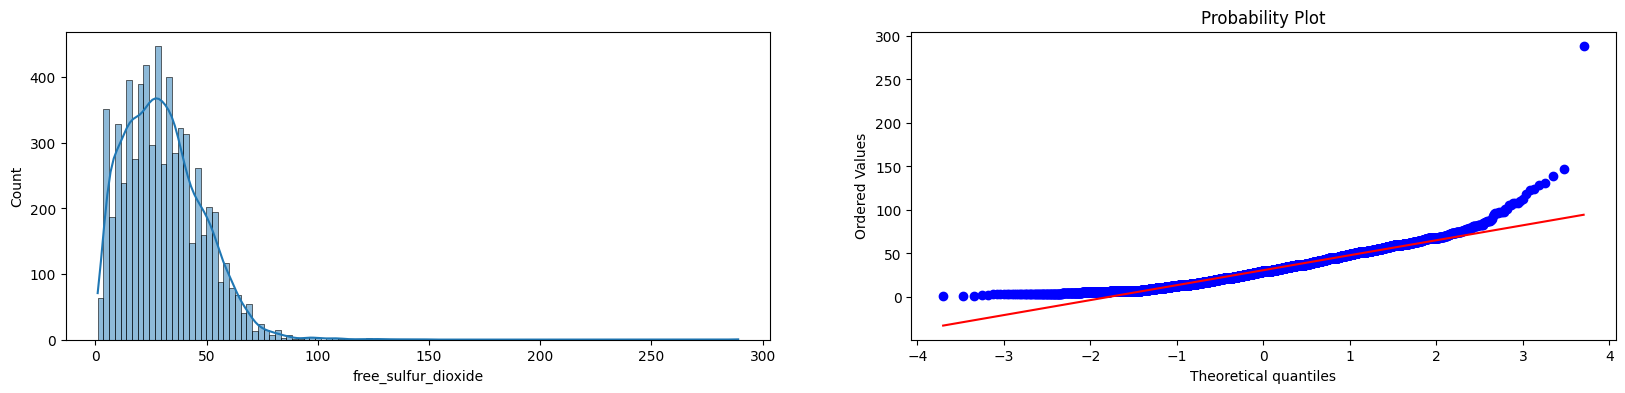

<Figure size 640x480 with 0 Axes>

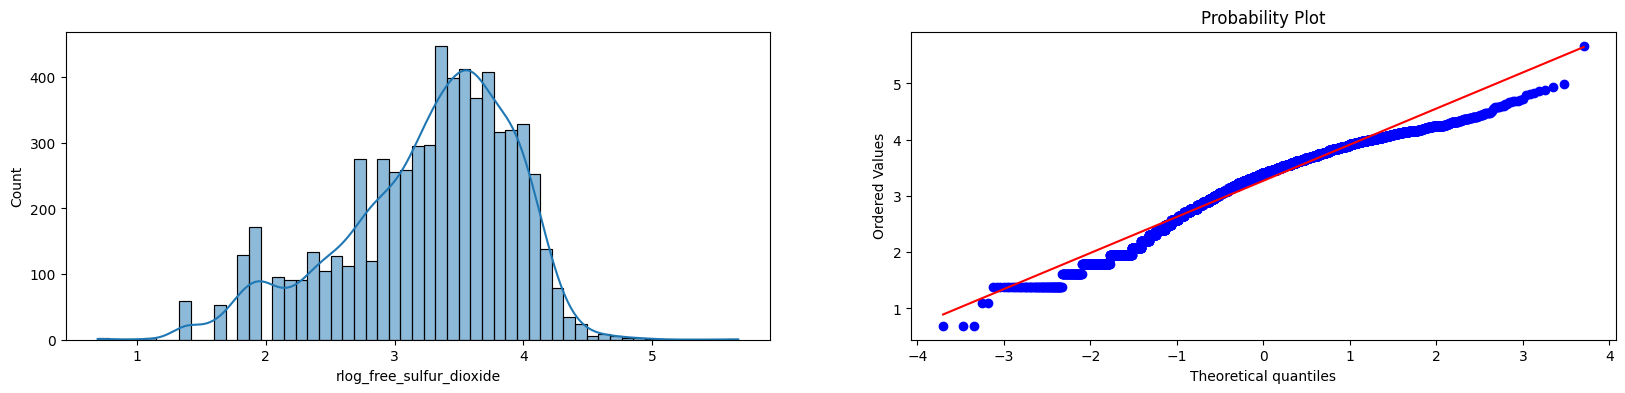

<Figure size 640x480 with 0 Axes>

In [67]:
f, axes = plt.subplots(1, 2, figsize=(20, 4))

sns.histplot(new_df['free_sulfur_dioxide'], ax=axes[0], kde = True)

scipy.stats.probplot(new_df['free_sulfur_dioxide'], plot=plt)
fig = plt.figure()

#Transformação logaritmica da variavel dependente preco
f, axes = plt.subplots(1, 2, figsize=(20, 4))

sns.histplot(new_df['rlog_free_sulfur_dioxide'], kde = True, ax=axes[0])

scipy.stats.probplot(new_df['rlog_free_sulfur_dioxide'], plot=plt)
fig = plt.figure()

#### Feature Enginnering - Data Encoding:

The quality of the wine has been categorised into 3 classes:

Low (<5) - 0 
Medium (between 5 and 6) - 1 
High (over 6) - 2 

In [68]:
def class_quality(row):
    if row['quality'] < 5:
        return 'low'
    elif row['quality'] >= 5 and row['quality'] <= 6:
        return 'medium'
    elif row['quality'] > 6:
        return 'high'
    
def class_quality_num(row):
    if row['quality'] < 5:
        return 0
    elif row['quality'] >= 5 and row['quality'] <= 6:
        return 1
    elif row['quality'] > 6:
        return 2
    
def type_encoding(row):
    if row['type'] == 'white':
        return 0
    elif row['type'] == 'red':
        return 1
    
new_df['quality_class'] = new_df.apply(class_quality, axis = 1)
new_df['quality_class'] = new_df['quality_class'].astype('category')
new_df['quality_num_class'] = new_df.apply(class_quality_num, axis = 1)
new_df['type_r2'] = new_df.apply(type_encoding, axis = 1)

In [69]:
new_df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type,rlog_fixed_acidity,rlog_volatile_acidity,rlog_citric_acid,rlog_residual_sugar,rlog_chlorides,rlog_free_sulfur_dioxide,rlog_total_sulfur_dioxide,rlog_density,rlog_pH,rlog_sulphates,rlog_alcohol,quality_class,quality_num_class,type_r2
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white,2.079442,0.239017,0.307485,3.077312,0.044017,3.828641,5.141664,0.693647,1.386294,0.371564,2.282382,medium,1,0
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white,1.987874,0.262364,0.292670,0.955511,0.047837,2.708050,4.890349,0.690143,1.458615,0.398776,2.351375,medium,1,0
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white,2.208274,0.246860,0.336472,2.066863,0.048790,3.433987,4.584967,0.690694,1.449269,0.364643,2.406945,medium,1,0
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white,2.104134,0.207014,0.277632,2.251292,0.056380,3.871201,5.231109,0.690945,1.432701,0.336472,2.388763,medium,1,0
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white,2.104134,0.207014,0.277632,2.251292,0.056380,3.871201,5.231109,0.690945,1.432701,0.336472,2.388763,medium,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red,1.974081,0.470004,0.076961,1.098612,0.086178,3.496508,3.806662,0.690594,1.492904,0.457425,2.442347,medium,1,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red,1.931521,0.438255,0.095310,1.163151,0.060154,3.688879,3.951244,0.690704,1.508512,0.565314,2.501436,medium,1,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red,1.987874,0.412110,0.122218,1.193922,0.073250,3.401197,3.713572,0.691015,1.486140,0.559616,2.484907,medium,1,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red,1.931521,0.497740,0.113329,1.098612,0.072321,3.496508,3.806662,0.690880,1.519513,0.536493,2.415914,medium,1,1


#### Data Saving:

**happy with the cleansing, now it's time to save the data to csv**

In [70]:
n_csv_path = current_dir / 'data' / 'processed' / 'wine_clean.csv'
new_df.to_csv(n_csv_path)